
# Posterior for Gaussian Distribution
-----------------------------------
Figure 5.5

The solid line in the top-left panel shows the posterior probability density
function :math:`p(\mu|\{x_i\},I)` described by eq. 5.60, for N = 10, x = 1 and
V = 4 (integral over :math:`\sigma` for the two-dimensional distribution shown
in figure 5.4). The dotted line shows an equivalent result when the prior for
:math:`\sigma` is uniform instead of proportional to :math:`\sigma - 1`.
The dashed line shows the Gaussian distribution with parameters given by
eqs. 3.31 and 3.34. For comparison, the circles illustrate the distribution
of the bootstrap estimates for the mean given by eq. 3.31. The solid line in
the top-right panel shows the posterior probability density function
:math:`p(\sigma|\{xi\},I)` described by eq. 5.62 (integral over :math:`\mu`
for the two-dimensional distribution shown in figure 5.4). The dotted line
shows an equivalent result when the prior for :math:`\sigma` is uniform.
The dashed line shows a Gaussian distribution with parameters given by
eqs. 3.32 and 3.35. The circles illustrate the distribution of the bootstrap
estimates for :math:`\sigma` given by eq. 3.32. The bottom two panels show
the corresponding cumulative distributions for solid and dashed lines,
and for bootstrap estimates, from the top panel.


In [ ]:
"""
Posterior for Gaussian Distribution
-----------------------------------
Figure 5.5

The solid line in the top-left panel shows the posterior probability density
function :math:`p(\mu|\{x_i\},I)` described by eq. 5.60, for N = 10, x = 1 and
V = 4 (integral over :math:`\sigma` for the two-dimensional distribution shown
in figure 5.4). The dotted line shows an equivalent result when the prior for
:math:`\sigma` is uniform instead of proportional to :math:`\sigma - 1`.
The dashed line shows the Gaussian distribution with parameters given by
eqs. 3.31 and 3.34. For comparison, the circles illustrate the distribution
of the bootstrap estimates for the mean given by eq. 3.31. The solid line in
the top-right panel shows the posterior probability density function
:math:`p(\sigma|\{xi\},I)` described by eq. 5.62 (integral over :math:`\mu`
for the two-dimensional distribution shown in figure 5.4). The dotted line
shows an equivalent result when the prior for :math:`\sigma` is uniform.
The dashed line shows a Gaussian distribution with parameters given by
eqs. 3.32 and 3.35. The circles illustrate the distribution of the bootstrap
estimates for :math:`\sigma` given by eq. 3.32. The bottom two panels show
the corresponding cumulative distributions for solid and dashed lines,
and for bootstrap estimates, from the top panel.
"""

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats import mean_sigma
from astroML.resample import bootstrap

In [3]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)


# Define functions for computations below

In [4]:
#------------------------------------------------------------
# Define functions for computations below
#  These are expected analytic fits to the posterior distributions
def compute_pmu(mu, xbar, V, n):
    return (1 + (xbar - mu) ** 2 / V) ** (-0.5 * n)


def compute_pmu_alt(mu, xbar, V, n):
    return (1 + (xbar - mu) ** 2 / V) ** (-0.5 * (n - 1))


def compute_psig(sig, V, n):
    return (sig ** -n) * np.exp(-0.5 * n * V / sig ** 2)


def compute_psig_alt(sig, V, n):
    return (sig ** -(n - 1)) * np.exp(-0.5 * n * V / sig ** 2)


def gaussian(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)


In [5]:
#------------------------------------------------------------
# Draw a random sample from the distribution, and compute
# some quantities
n = 10
xbar = 1
V = 4
sigma_x = np.sqrt(V)

np.random.seed(10)
xi = np.random.normal(xbar, sigma_x, size=n)

mu_mean, sig_mean = mean_sigma(xi, ddof=1)

# compute the analytically expected spread in measurements
mu_std = sig_mean / np.sqrt(n)
sig_std = sig_mean / np.sqrt(2 * (n - 1))


# bootstrap estimates

In [10]:
#------------------------------------------------------------
# bootstrap estimates
mu_bootstrap, sig_bootstrap = bootstrap(xi, int(1E6), mean_sigma, kwargs=dict(ddof=1, axis=1))


# Compute analytic posteriors

In [11]:
#------------------------------------------------------------
# Compute analytic posteriors

# distributions for the mean
mu = np.linspace(-3, 5, 1000)
dmu = mu[1] - mu[0]

pmu = compute_pmu(mu, 1, 4, 10)
pmu /= (dmu * pmu.sum())

pmu2 = compute_pmu_alt(mu, 1, 4, 10)
pmu2 /= (dmu * pmu2.sum())

pmu_norm = gaussian(mu, mu_mean, mu_std)
pmu_norm /= (dmu * pmu_norm.sum())

mu_hist, mu_bins = np.histogram(mu_bootstrap, 20)
mu_dbin = np.diff(mu_bins).astype(float)
mu_hist = mu_hist / mu_dbin / mu_hist.sum()

# distributions for the standard deviation
sig = np.linspace(1E-4, 8, 1000)
dsig = sig[1] - sig[0]
psig = compute_psig(sig, 4, 10)
psig /= (dsig * psig.sum())

psig2 = compute_psig_alt(sig, 4, 10)
psig2 /= (dsig * psig2.sum())

psig_norm = gaussian(sig, sig_mean, sig_std)
psig_norm /= (dsig * psig_norm.sum())

sig_hist, sig_bins = np.histogram(sig_bootstrap, 20)
sig_dbin = np.diff(sig_bins).astype(float)
sig_hist = sig_hist / sig_dbin / sig_hist.sum()


# Plot the results

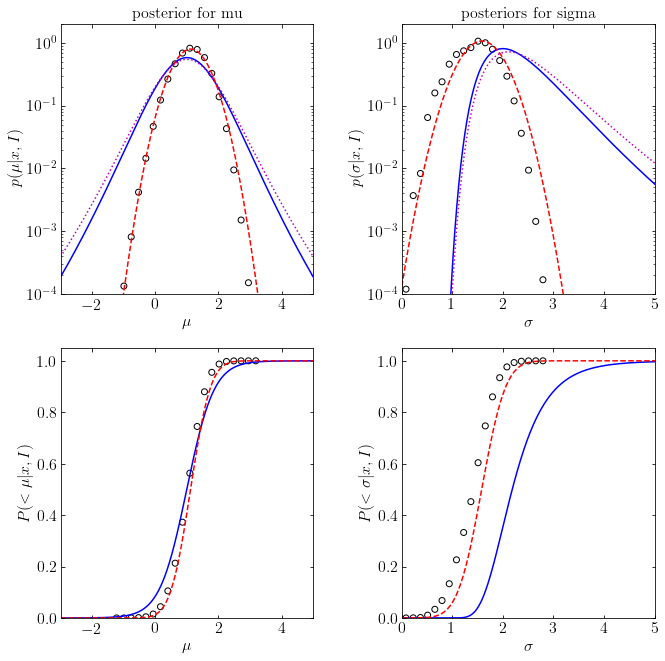

In [14]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.35, right=0.95,
                    hspace=0.2, top=0.95)

# plot posteriors for mu
ax1 = plt.subplot(221, yscale='log')
ax1.plot(mu, pmu, '-b')
ax1.plot(mu, pmu2, ':m')
ax1.plot(mu, pmu_norm, '--r')
ax1.scatter(mu_bins[1:] - 0.5 * mu_dbin, mu_hist,edgecolor='k', facecolor='none')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$p(\mu|x,I)$')
ax1.set_title("posterior for mu")

ax2 = plt.subplot(223, sharex=ax1)
ax2.plot(mu, pmu.cumsum() * dmu, '-b')
ax2.plot(mu, pmu_norm.cumsum() * dmu, '--r')
ax2.scatter(mu_bins[1:] - 0.5 * mu_dbin, mu_hist.cumsum() * mu_dbin,
            edgecolor='k', facecolor='none')
ax2.set_xlim(-3, 5)

ax2.set_xlabel(r'$\mu$')
ax2.set_ylabel(r'$P(<\mu|x,I)$')

# plot posteriors for sigma
ax3 = plt.subplot(222, sharey=ax1)
ax3.plot(sig, psig, '-b')
ax3.plot(sig, psig2, ':m')
ax3.plot(sig, psig_norm, '--r')
ax3.scatter(sig_bins[1:] - 0.5 * sig_dbin, sig_hist,
            edgecolor='k', facecolor='none')
ax3.set_ylim(1E-4, 2)

ax3.set_xlabel(r'$\sigma$')
ax3.set_ylabel(r'$p(\sigma|x,I)$')
ax3.set_title("posteriors for sigma")

ax4 = plt.subplot(224, sharex=ax3, sharey=ax2)
ax4.plot(sig, psig.cumsum() * dsig, '-b')
ax4.plot(sig, psig_norm.cumsum() * dsig, '--r')
ax4.scatter(sig_bins[1:] - 0.5 * sig_dbin, sig_hist.cumsum() * sig_dbin,
            edgecolor='k', facecolor='none')
ax4.set_ylim(0, 1.05)
ax4.set_xlim(0, 5)

ax4.set_xlabel(r'$\sigma$')
ax4.set_ylabel(r'$P(<\sigma|x,I)$')

plt.show()
